<a href="https://colab.research.google.com/github/Giraldo0712/TAM_2025_2/blob/main/Ejercicio_RMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_regression
N = 1000 # Samples
P = 20 # Features
X, y = make_regression(n_samples=N, n_features=P,
                      noise = 1, random_state = 42)
print(X.shape, y.shape)

(1000, 20) (1000,)


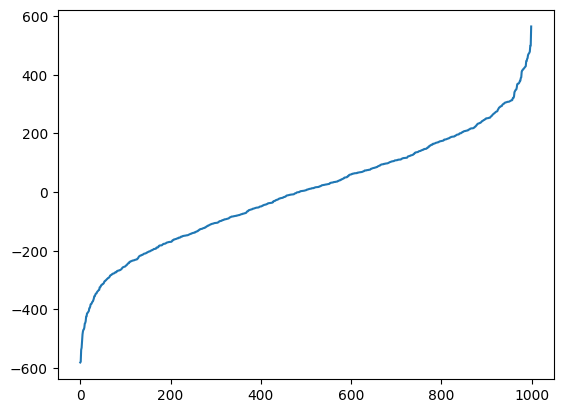

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.sort(y))
plt.show()

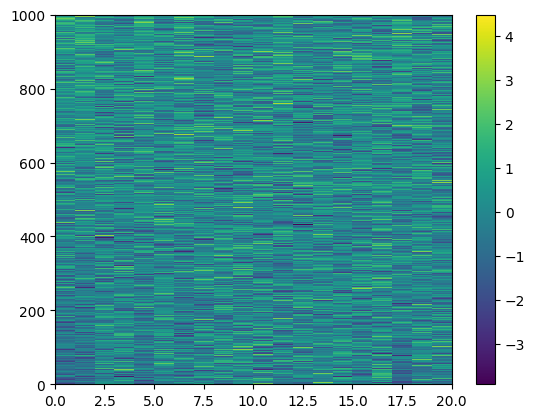

In [ ]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()

In [ ]:
def mincua_reg(X, y, lam_ = 1e-3): # fit, opt
  alpha = np.linalg.inv(X.T.dot(X)+lam_*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha



[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


<StemContainer object of 3 artists>

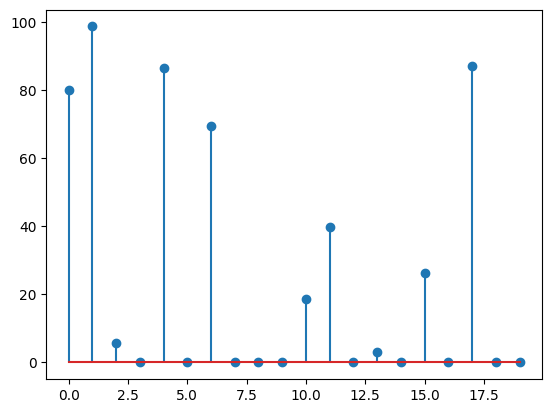

In [ ]:
alpha = mincua_reg(X, y)
print(alpha)
plt.stem(np.arange(len(alpha)), np.abs(alpha))

In [ ]:
ypred = X.dot(alpha)

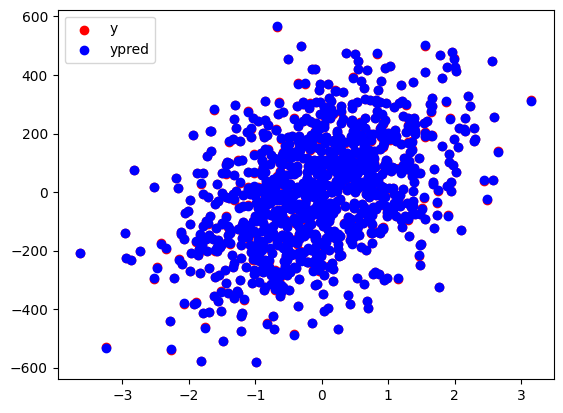

In [ ]:
plt.scatter(X[ind_,0],y[ind_], color = 'red', marker = 'o', label = 'y')
plt.scatter(X[ind_,0],ypred[ind_], c = 'blue', label = 'ypred')
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


(20640, 8) (20640,)


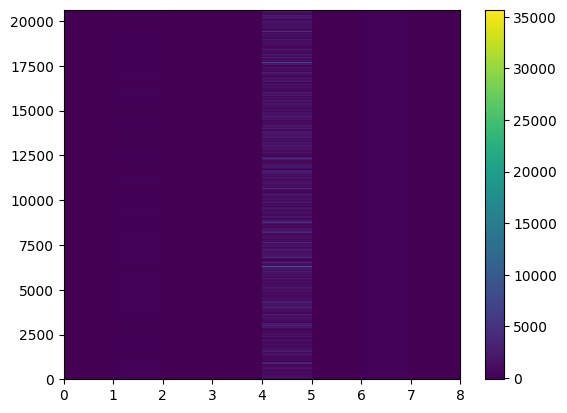

In [ ]:
X = housing.data
y = housing.target
print(X.shape, y.shape)
plt.pcolormesh(X)
plt.colorbar()
plt.show()

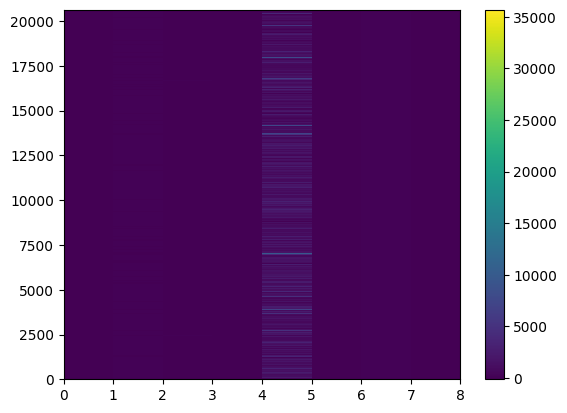

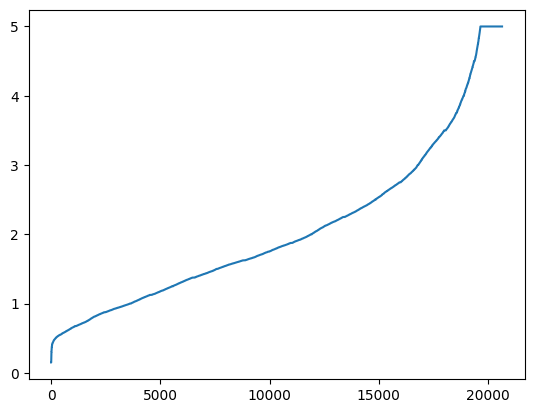

In [ ]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()
plt.plot(y[ind_])
plt.show()


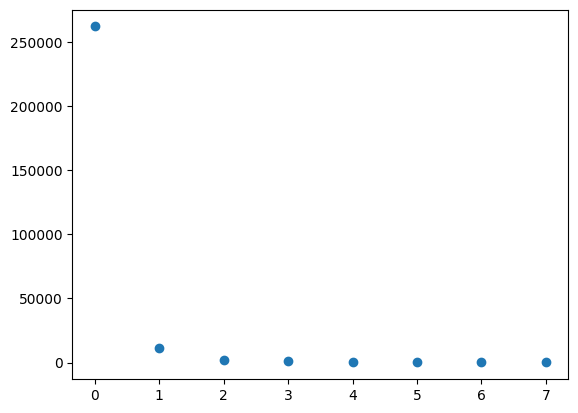

In [ ]:
U,S,Vh = np.linalg.svd(X)
plt.scatter(np.arange(len(S)), S)
plt.show()

[ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]


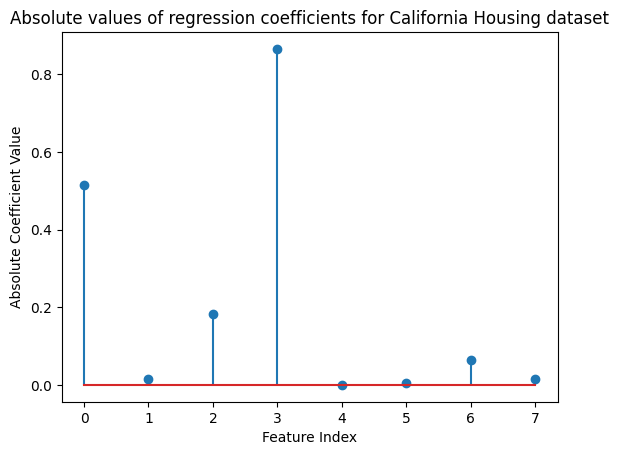

In [ ]:
alpha_housing = mincua_reg(X, y)
print(alpha_housing)
plt.stem(np.arange(len(alpha_housing)), np.abs(alpha_housing))
plt.title('Absolute values of regression coefficients for California Housing dataset')
plt.xlabel('Feature Index')
plt.ylabel('Absolute Coefficient Value')
plt.show()

In [ ]:
ypred = X.dot(alpha_housing)

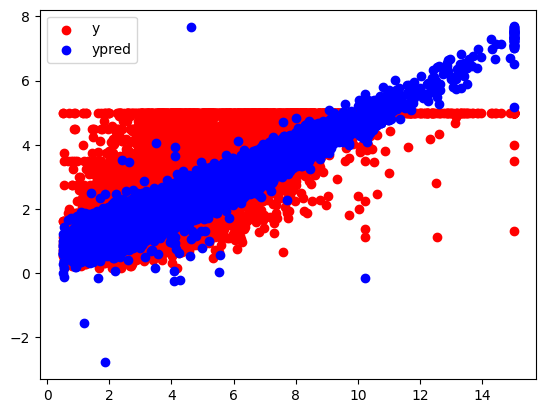

In [ ]:
plt.scatter(X[:,0], y, color = 'red', label = 'y')
plt.scatter(X[:,0], ypred, c = 'blue', label = 'ypred')
plt.legend()
plt.show()

# **Soluci칩n primer ejercicio**

# Regresi칩n Lineal: Anal칤tica vs Gradiente Descendente

En este notebook vamos a resolver el problema de **regresi칩n lineal** de dos formas:

1. **Soluci칩n Anal칤tica (M칤nimos Cuadrados)**  
2. **Soluci칩n Iterativa (Gradiente Descendente)**  



# Problema

Queremos ajustar un modelo lineal de la forma:

$$
y \approx X \alpha
$$

donde:
- \(X\) es la matriz de caracter칤sticas de tama침o \(N \times P\),
- \(y\) es el vector de salida de tama침o \(N \times 1\),
- \(\alpha\) es el vector de par치metros que queremos estimar.



#  Funci칩n de costo

Usamos el **error cuadr치tico medio (MSE)** con una regularizaci칩n tipo **Ridge (L2)**:

$$
J(\alpha) = \frac{1}{2N} \| y - X\alpha \|^2 + \frac{\lambda}{2} \|\alpha\|^2
$$



#  Soluci칩n anal칤tica

La soluci칩n cerrada de m칤nimos cuadrados regularizados es:

$$
\alpha = (X^T X + \lambda I)^{-1} X^T y
$$

Esta f칩rmula nos da directamente los par치metros \(\alpha\) sin necesidad de iterar.



#  Gradiente descendente

En este m칠todo, **iterativamente** vamos actualizando los par치metros hasta encontrar un m칤nimo del costo.

### Gradiente del costo
$$
\nabla_\alpha J(\alpha) = -\frac{1}{N} X^T (y - X\alpha) + \lambda \alpha
$$

### Regla de actualizaci칩n
$$
\alpha^{(k+1)} = \alpha^{(k)} - \eta \, \nabla_\alpha J(\alpha^{(k)})
$$

donde:
- \(\eta\) es la **tasa de aprendizaje**,
- \(k\) indica la iteraci칩n.



#  Comparaci칩n esperada

1. La funci칩n de costo debe **disminuir con las iteraciones** hasta estabilizarse.  
2. Los coeficientes \(\alpha\) obtenidos por **gradiente descendente** deben aproximarse a los de la **soluci칩n anal칤tica**.  
3. Las predicciones con ambos m칠todos deben ser pr치cticamente iguales.  


Coeficientes anal칤ticos:
 [ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]
Coeficientes GD:
 [ 7.99234120e+01  9.84967126e+01  5.56727564e+00  2.89041644e-02
  8.63811498e+01 -4.14774203e-02  6.93685201e+01 -3.15422212e-03
  1.71832750e-02 -2.97753472e-02  1.85986936e+01  3.96180844e+01
  5.85738203e-03  3.09818535e+00 -4.63238735e-02  2.63652095e+01
 -3.39829781e-02  8.68070799e+01  3.66815489e-02  1.64772659e-02]


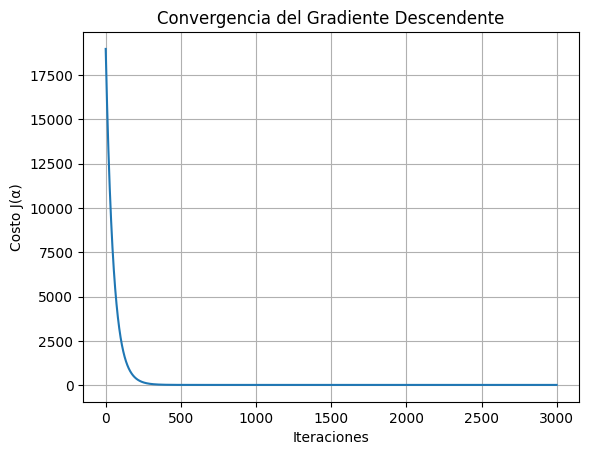

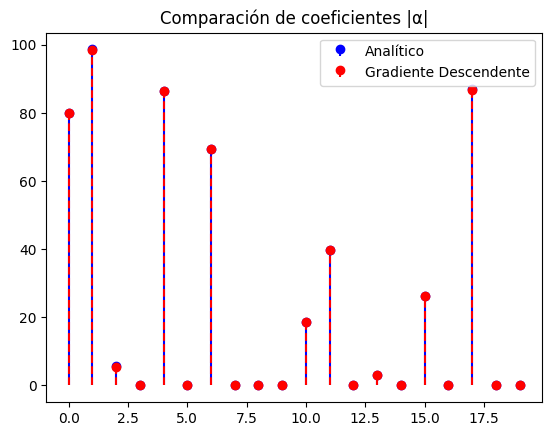

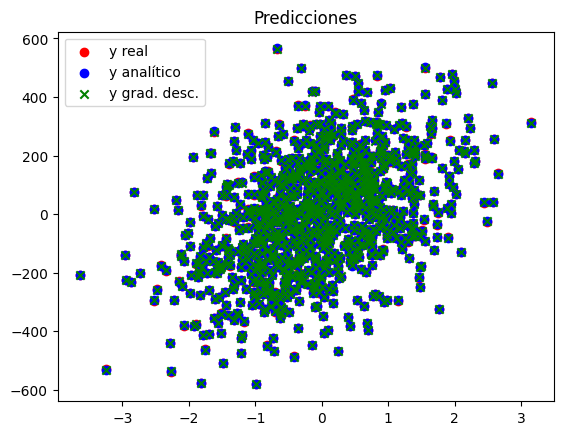

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

# -------------------
# Soluci칩n anal칤tica
# -------------------
def mincua_reg(X,y,lamb_=1e-3):
    alpha = np.linalg.inv(X.T @ X + lamb_*np.eye(X.shape[1])) @ (X.T @ y)
    return alpha

# -------------------
# Gradiente descendente
# -------------------
def grad_desc_reg(X, y, lamb_=1e-3, lr=1e-3, epochs=2000):
    N, P = X.shape
    alpha = np.zeros(P)   # Inicializaci칩n
    history = []

    for _ in range(epochs):
        # Predicci칩n
        y_pred = X @ alpha

        # Gradiente
        grad = -(1/N) * (X.T @ (y - y_pred)) + lamb_ * alpha

        # Actualizaci칩n
        alpha -= lr * grad

        # Costo
        cost = (1/(2*N)) * np.sum((y - y_pred)**2) + (lamb_/2) * np.sum(alpha**2)
        history.append(cost)

    return alpha, history


# -------------------
# Datos
# -------------------
N = 1000  # muestras
P = 20    # features
X, y = make_regression(n_samples=N, n_features=P, noise=1, random_state=42)

# Ordenar para graficar
ind_ = np.argsort(y)

# -------------------
# Soluci칩n anal칤tica
# -------------------
alpha_analitico = mincua_reg(X, y)
print("Coeficientes anal칤ticos:\n", alpha_analitico)

# -------------------
# Soluci칩n por gradiente descendente
# -------------------
alpha_gd, history = grad_desc_reg(X, y, lamb_=1e-3, lr=1e-2, epochs=3000)
print("Coeficientes GD:\n", alpha_gd)

# -------------------
# Gr치ficas
# -------------------

# 1. Convergencia del costo
plt.plot(history)
plt.xlabel("Iteraciones")
plt.ylabel("Costo J(풤)")
plt.title("Convergencia del Gradiente Descendente")
plt.grid(True)
plt.show()

# 2. Comparaci칩n de magnitudes de coeficientes
plt.stem(np.arange(len(alpha_analitico)), np.abs(alpha_analitico), linefmt='b-', markerfmt='bo', basefmt=' ')
plt.stem(np.arange(len(alpha_gd)), np.abs(alpha_gd), linefmt='r--', markerfmt='ro', basefmt=' ')
plt.title("Comparaci칩n de coeficientes |풤|")
plt.legend(["Anal칤tico", "Gradiente Descendente"])
plt.show()

# 3. Comparaci칩n de predicciones
ypred_analitico = X @ alpha_analitico
ypred_gd = X @ alpha_gd

plt.scatter(X[ind_,0], y[ind_], c='r', marker='o', label='y real')
plt.scatter(X[ind_,0], ypred_analitico[ind_], c='b', label='y anal칤tico')
plt.scatter(X[ind_,0], ypred_gd[ind_], c='g', marker='x', label='y grad. desc.')
plt.legend()
plt.title("Predicciones")
plt.show()


#  Interpretaci칩n de las gr치ficas

### 1. Convergencia del costo
La primera gr치fica muestra c칩mo el valor de la funci칩n de costo \(J(\alpha)\) disminuye con las iteraciones del gradiente descendente.  
- Se observa que al inicio el costo es alto.  
- A medida que se realizan m치s iteraciones, el costo converge hacia un valor estable.  
- Esto indica que el algoritmo est치 aprendiendo los coeficientes correctos.  

---

### 2. Comparaci칩n de coeficientes
La segunda gr치fica compara la magnitud de los coeficientes \(|\alpha|\) obtenidos por:
- **Anal칤tico (l칤nea azul)**  
- **Gradiente Descendente (l칤nea roja discontinua)**  

La superposici칩n de ambas curvas muestra que los valores encontrados con gradiente descendente son pr치cticamente los mismos que con la soluci칩n cerrada.  
Esto confirma que el m칠todo iterativo llega a la misma soluci칩n.  

---

### 3. Predicciones
La tercera gr치fica compara los valores reales \(y\) contra las predicciones:  
- **Rojo**: valores reales.  
- **Azul**: predicciones con la soluci칩n anal칤tica.  
- **Verde**: predicciones con gradiente descendente.  

Ambas predicciones (azul y verde) se ajustan casi perfectamente a los datos reales, demostrando que los dos m칠todos son equivalentes en este caso.  

---

En conclusi칩n:  
- El gradiente descendente es m치s costoso en n칰mero de iteraciones, pero es escalable para problemas grandes.  
- La soluci칩n anal칤tica es exacta y r치pida, pero no es viable cuando la matriz \(X^T X\) es muy grande (por ejemplo, con millones de caracter칤sticas).  
"""


# **Solucion segundo ejercicio**

# 游늷 Regresi칩n Lineal con California Housing

En este notebook vamos a resolver un problema de **regresi칩n lineal** usando el dataset
California Housing de `sklearn`.

Lo resolveremos de dos formas:

1. **Soluci칩n Anal칤tica (M칤nimos Cuadrados con regularizaci칩n ridge).**
2. **Soluci칩n Iterativa (Gradiente Descendente).**



# Problema

Queremos ajustar un modelo lineal de la forma:

$$
y \approx X \alpha
$$

donde:
- \(X\) es la matriz de caracter칤sticas de tama침o \(N \times P\),
- \(y\) es el vector de precios de vivienda,
- \(\alpha\) son los par치metros que vamos a estimar.




# Funci칩n de costo

La funci칩n de costo con regularizaci칩n ridge es:

$$
J(\alpha) = \frac{1}{2N} \| y - X\alpha \|^2 + \frac{\lambda}{2} \|\alpha\|^2
$$


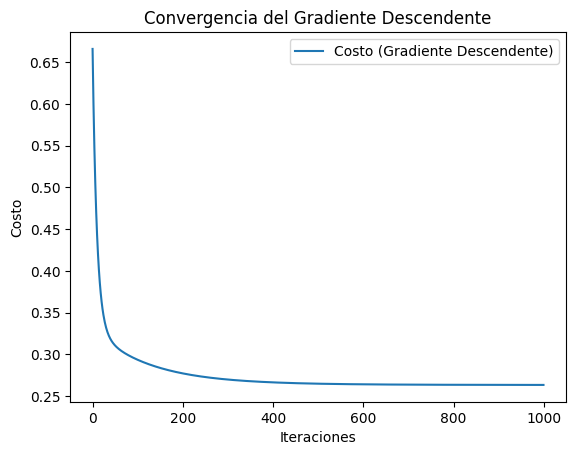

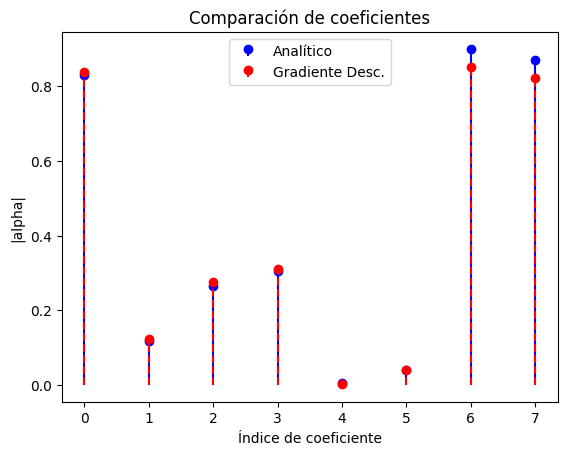

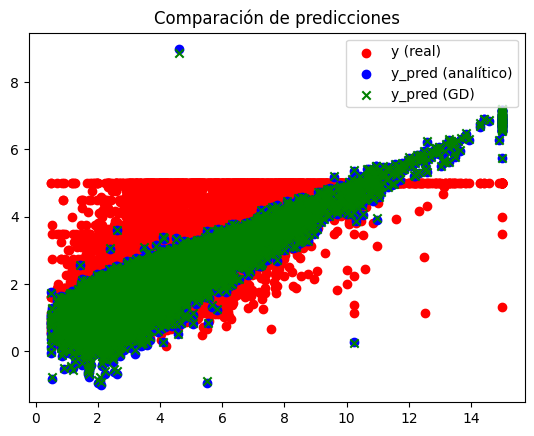

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# --------------------
# Funci칩n de m칤nimos cuadrados regularizados
# --------------------
def mincua_reg(X, y, lamb_=1e-3):
    alpha = np.linalg.inv(X.T.dot(X) + lamb_ * np.eye(X.shape[1])).dot(X.T).dot(y)
    return alpha

# --------------------
# Cargar dataset
# --------------------
housing = fetch_california_housing()
X_raw = housing.data
y_raw = housing.target

# --------------------
# Normalizaci칩n y centrado
# --------------------
X_mean, X_std = X_raw.mean(axis=0), X_raw.std(axis=0)
y_mean = y_raw.mean()

X = (X_raw - X_mean) / X_std
y = y_raw - y_mean

N, P = X.shape

# --------------------
# Gradiente Descendente
# --------------------
def gradient_descent(X, y, lr=0.01, lamb=1e-3, iters=2000):
    N, P = X.shape
    alpha = np.zeros(P)  # inicializaci칩n en ceros
    costs = []

    for i in range(iters):
        y_pred = X.dot(alpha)
        error = y_pred - y
        cost = (1/(2*N)) * np.sum(error**2) + (lamb/2) * np.sum(alpha**2)
        costs.append(cost)

        # Gradiente
        grad = (1/N) * X.T.dot(error) + lamb * alpha
        alpha -= lr * grad

    return alpha, costs

# --------------------
# Entrenamiento con gradiente descendente
# --------------------
alpha_gd, costs = gradient_descent(X, y, lr=0.05, lamb=1e-3, iters=1000)

# --------------------
# Soluci칩n anal칤tica (para comparaci칩n)
# --------------------
alpha_analitico_scaled = mincua_reg(X, y, lamb_=1e-3)

# --------------------
# Graficar el costo vs iteraciones
# --------------------
plt.plot(costs, label="Costo (Gradiente Descendente)")
plt.xlabel("Iteraciones")
plt.ylabel("Costo")
plt.title("Convergencia del Gradiente Descendente")
plt.legend()
plt.show()

# --------------------
# Comparaci칩n de coeficientes
# --------------------
plt.stem(np.arange(len(alpha_analitico_scaled)), np.abs(alpha_analitico_scaled), linefmt='b-', markerfmt='bo', basefmt=" ", label="Anal칤tico")
plt.stem(np.arange(len(alpha_gd)), np.abs(alpha_gd), linefmt='r--', markerfmt='ro', basefmt=" ", label="Gradiente Desc.")
plt.xlabel("칈ndice de coeficiente")
plt.ylabel("|alpha|")
plt.legend()
plt.title("Comparaci칩n de coeficientes")
plt.show()

# --------------------
# Predicciones
# --------------------
y_pred_gd = X.dot(alpha_gd) + y_mean
y_pred_an = X.dot(alpha_analitico_scaled) + y_mean

ind_ = np.argsort(y_raw)

plt.scatter(X_raw[ind_,0], y_raw[ind_], c='r', marker='o', label='y (real)')
plt.scatter(X_raw[ind_,0], y_pred_an[ind_], c='b', label='y_pred (anal칤tico)')
plt.scatter(X_raw[ind_,0], y_pred_gd[ind_], c='g', marker='x', label='y_pred (GD)')
plt.legend()
plt.title("Comparaci칩n de predicciones")
plt.show()



# Interpretaci칩n de las gr치ficas

### 1. Convergencia del costo
La primera gr치fica muestra c칩mo el costo \(J(\alpha)\) disminuye con las iteraciones.
Esto indica que el algoritmo est치 encontrando los par치metros correctos.

---

### 2. Comparaci칩n de coeficientes
La segunda gr치fica compara los coeficientes obtenidos por:
- **Anal칤tico (azul)**
- **Gradiente Descendente (rojo)**

Se observa que ambos son muy similares, lo que significa que el gradiente descendente
llega a la misma soluci칩n que la f칩rmula cerrada.

---

### 3. Predicciones
La tercera gr치fica compara:
- **Rojo**: valores reales de los precios.
- **Azul**: predicciones con la soluci칩n anal칤tica.
- **Verde**: predicciones con gradiente descendente.

Ambos m칠todos ajustan de manera parecida, confirmando que son equivalentes en este problema.

---

Conclusi칩n:
- La soluci칩n anal칤tica es m치s r치pida en este caso porque \(X\) no es enorme.
- El gradiente descendente es m치s flexible y 칰til cuando el n칰mero de caracter칤sticas es muy grande.
"""
